In [1]:
# import libraries
import numpy as np
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

%matplotlib inline

In [2]:
DATA_Path = '/home/aaranyak/Documents/ml_projects/ml_projects/Disease Prediction using ML/Testing.csv'
df = pd.read_csv(DATA_Path)

In [3]:
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


In [4]:
df.isnull().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [5]:
df.dropna(axis=1)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Peptic ulcer diseae
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,AIDS
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Diabetes
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Gastroenteritis
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Bronchial Asthma


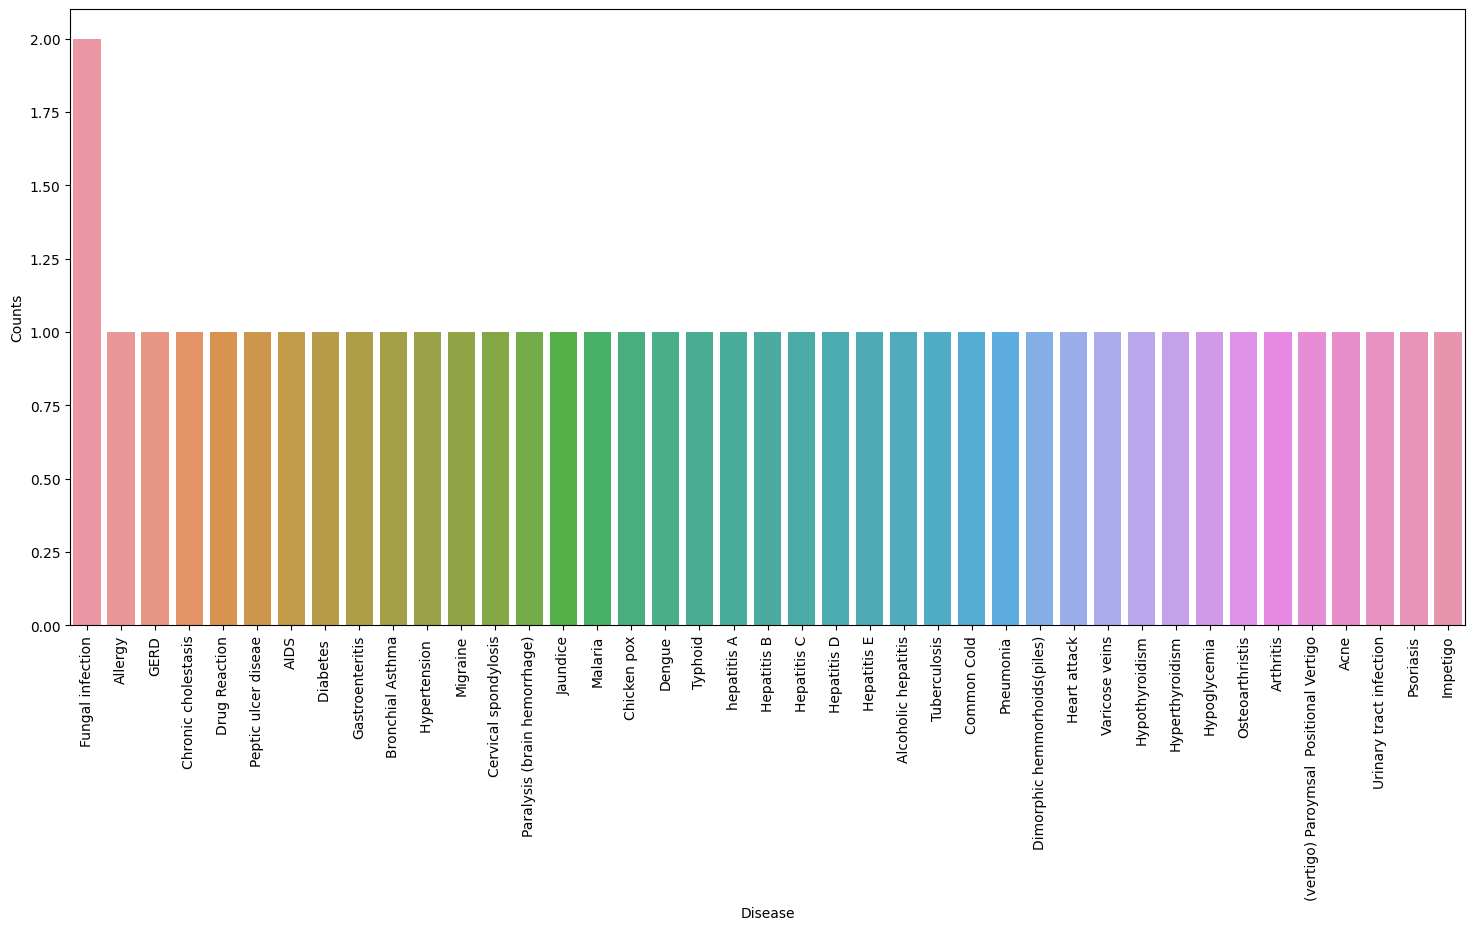

In [6]:
# checking whether the dataset is balanced or not.

disease_counts = df['prognosis'].value_counts()
temp_df = pd.DataFrame({"Disease":disease_counts.index,"Counts":disease_counts.values})

plt.figure(figsize=(18,8))
sns.barplot(x = "Disease",y = "Counts",data = temp_df)
plt.xticks(rotation=90)
plt.show()

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
itching,42.0,0.166667,0.377195,0.0,0.0,0.0,0.0,1.0
skin_rash,42.0,0.190476,0.397437,0.0,0.0,0.0,0.0,1.0
nodal_skin_eruptions,42.0,0.023810,0.154303,0.0,0.0,0.0,0.0,1.0
continuous_sneezing,42.0,0.047619,0.215540,0.0,0.0,0.0,0.0,1.0
shivering,42.0,0.023810,0.154303,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
small_dents_in_nails,42.0,0.023810,0.154303,0.0,0.0,0.0,0.0,1.0
inflammatory_nails,42.0,0.023810,0.154303,0.0,0.0,0.0,0.0,1.0
blister,42.0,0.023810,0.154303,0.0,0.0,0.0,0.0,1.0
red_sore_around_nose,42.0,0.047619,0.215540,0.0,0.0,0.0,0.0,1.0


In [8]:
df.shape

(42, 133)

The prognosis column is of object datatype so we will convert that into numerical type.

In [9]:
# Label Encoding
encoder = LabelEncoder()
df['prognosis'] = encoder.fit_transform(df['prognosis'])

In [10]:
# splitting the dataset into training and testing.
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=24)

In [11]:
print(f'xtrain_shape: {x_train.shape},ytrain_shape: {y_train.shape}')
print(f'xtest_shape: {x_test.shape},ytest_shape: {y_test.shape}')

xtrain_shape: (33, 132),ytrain_shape: (33,)
xtest_shape: (9, 132),ytest_shape: (9,)


Using k-fold cross validation for model evaluation

In [15]:
from sklearn.model_selection import StratifiedKFold
def cv_scoring(estimator,x,y):
    return accuracy_score(y,estimator.predict(x))


# initializing the models
models = {
    "SVC":SVC(),
    "Gaussian NB":GaussianNB(),
    "Random Forest":RandomForestClassifier(random_state=18)
}

# producing cross validation scores for the models
for model_name in models:
    model = models[model_name]
    cv = StratifiedKFold(n_splits=2)
    scores = cross_val_score(model,x,y,cv=cv,n_jobs=-1,scoring=cv_scoring)

    print("=="*30)
    print(model_name)
    print(f'Scores: {scores}')
    print(f'mean scores: {np.mean(scores)}')

/home/aaranyak/miniconda3/lib/python3.10/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


SVC
Scores: [0.         0.04761905]
mean scores: 0.023809523809523808


/home/aaranyak/miniconda3/lib/python3.10/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


Gaussian NB
Scores: [0.         0.04761905]
mean scores: 0.023809523809523808


/home/aaranyak/miniconda3/lib/python3.10/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


Random Forest
Scores: [0.         0.04761905]
mean scores: 0.023809523809523808


Therefore all the models are  making good predictions.

accuracy on train dataset by SVM classifier, 90.9090909090909
accuracy on test dataset by SVM classifier, 0.0


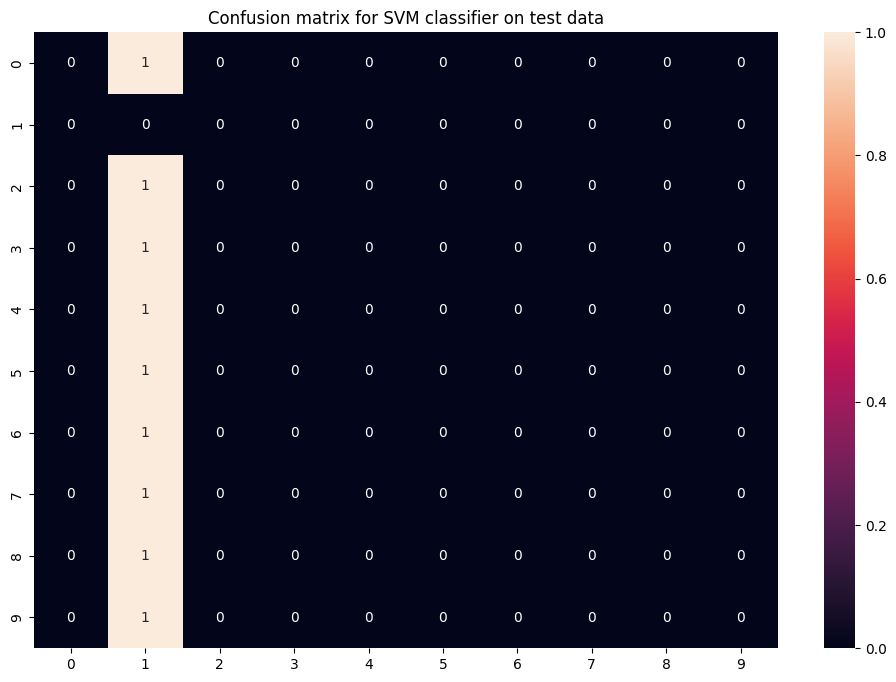

In [17]:
# Training and testing SVM classifier
svm_model = SVC()
svm_model.fit(x_train,y_train)
pred = svm_model.predict(x_test)

print(f"accuracy on train dataset by SVM classifier, {accuracy_score(y_train,svm_model.predict(x_train))*100}")
print(f"accuracy on test dataset by SVM classifier, {accuracy_score(y_test,pred)*100}")


cf_matrix = confusion_matrix(y_test,pred)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix,annot=True)
plt.title("Confusion matrix for SVM classifier on test data")
plt.show()

accuracy score on train dataset by Naive Bayes Classifier, 100.0
accuracy socre on test dataset by Naive Bayes Classifier, 0.0


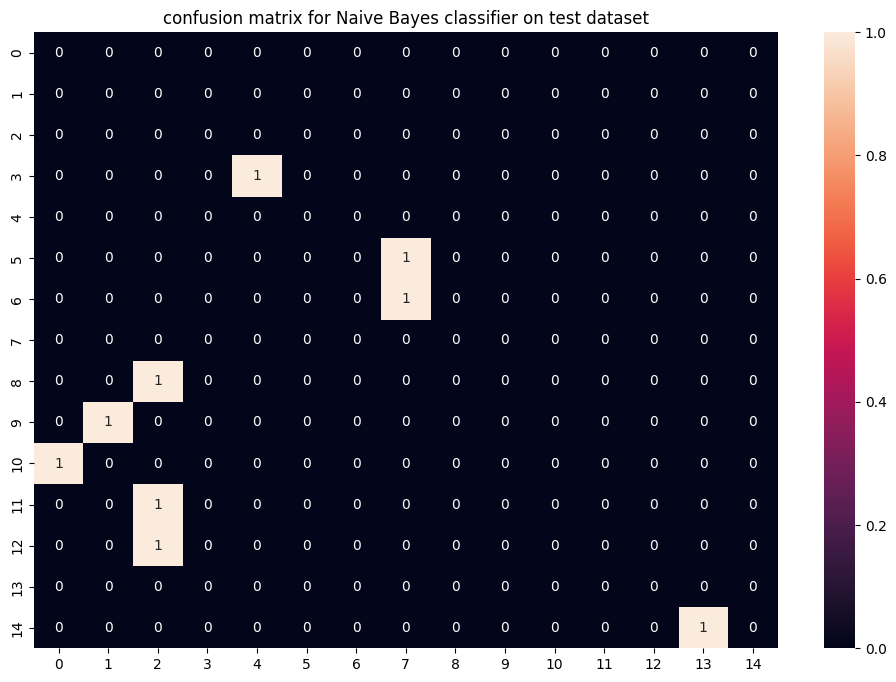

In [18]:
# Training and testing on Naive Bayes Classifier
nb_model = GaussianNB()
nb_model.fit(x_train,y_train)
pred = nb_model.predict(x_test)

print(f"accuracy score on train dataset by Naive Bayes Classifier, {accuracy_score(y_train,nb_model.predict(x_train))*100}")
print(f"accuracy socre on test dataset by Naive Bayes Classifier, {accuracy_score(y_test,pred)*100}")

cf_matrix = confusion_matrix(y_test,pred)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix,annot=True)
plt.title("confusion matrix for Naive Bayes classifier on test dataset")
plt.show()

accuracy score on train dataset by RandomForestClassifier, 100.0
accuracy score on test dataset by RandomForestClassifier, 0.0


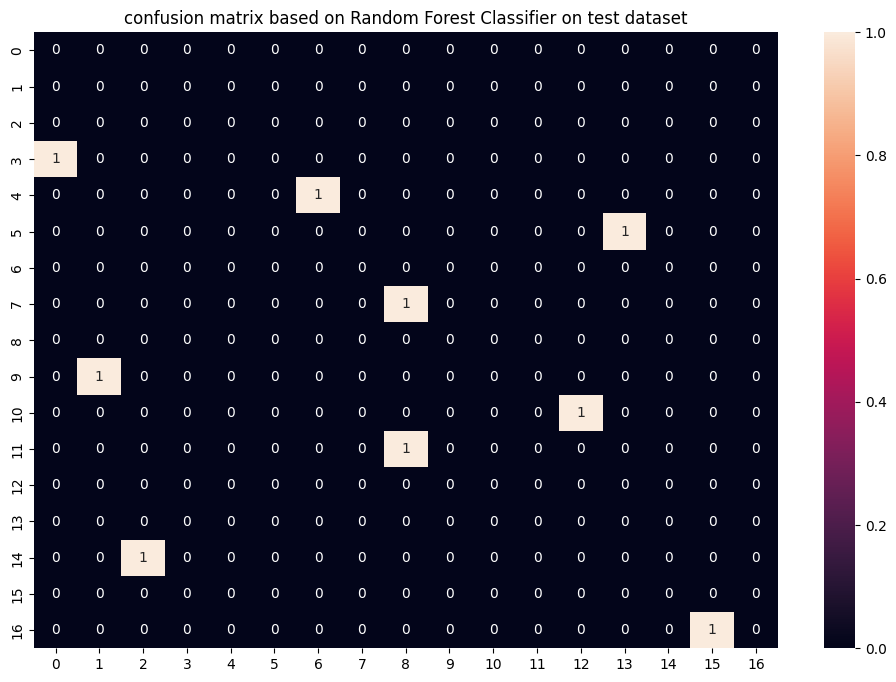

In [19]:
# training and testing on Random Forest Classifier
rf_model = RandomForestClassifier(random_state=18)
rf_model.fit(x_train,y_train)
pred = rf_model.predict(x_test)


print(f"accuracy score on train dataset by RandomForestClassifier, {accuracy_score(y_train,rf_model.predict(x_train))*100}")
print(f"accuracy score on test dataset by RandomForestClassifier, {accuracy_score(y_test,pred)*100}")

cf_matrix = confusion_matrix(y_test,pred)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix,annot=True)
plt.title("confusion matrix based on Random Forest Classifier on test dataset")
plt.show()

Now we will be fitting the model on whole train dataset and then test on the test dataset.

In [20]:
# now we will train the model on whole data
final_svm_model = SVC()
final_nb_model = GaussianNB()
final_rf_model = RandomForestClassifier(random_state=18)
final_svm_model.fit(x,y)
final_nb_model.fit(x,y)
final_rf_model.fit(x,y)

RandomForestClassifier(random_state=18)

In [21]:
# reading the test dataset
test_data = pd.read_csv('/home/aaranyak/Documents/ml_projects/ml_projects/Disease Prediction using ML/Testing.csv').dropna(axis=1)

In [25]:
encode = LabelEncoder()

test_x = test_data.iloc[:,:-1]
test_y = encode.fit_transform(test_data.iloc[:,-1])

accuracy on the test dataset by the combined model: ,100.0


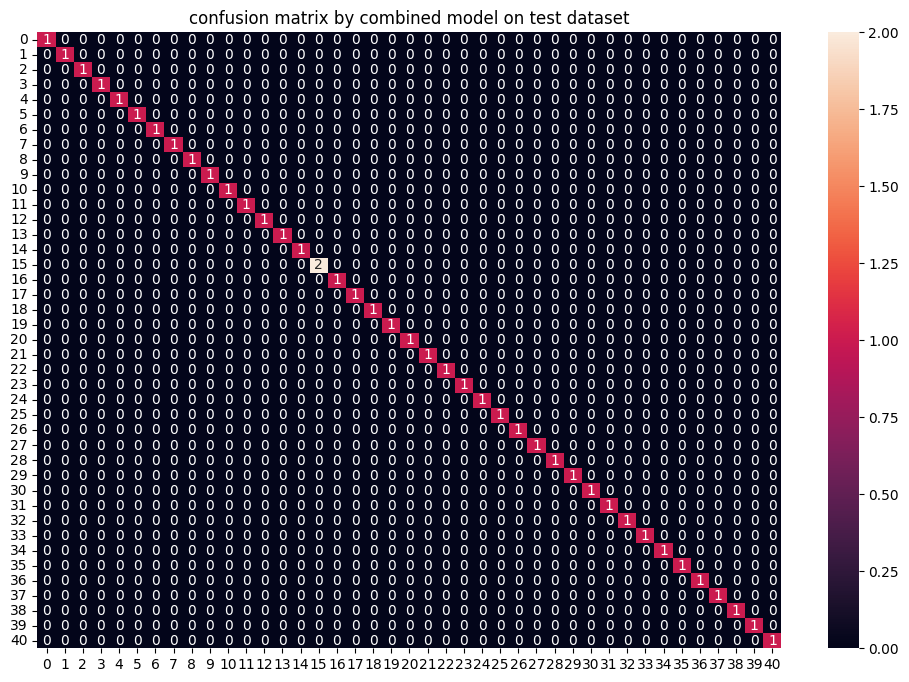

In [27]:
from collections import Counter

svm_preds = final_svm_model.predict(test_x)
rf_preds = final_rf_model.predict(test_x)
nb_preds = final_nb_model.predict(test_x)

final_preds = [Counter([i, j, k]).most_common(1)[0][0] for i, j, k in zip(svm_preds, rf_preds, nb_preds)]

print(f"accuracy on the test dataset by the combined model: ,{accuracy_score(test_y,final_preds)*100}")

cf_matrix = confusion_matrix(test_y,final_preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix,annot=True)
plt.title("confusion matrix by combined model on test dataset")
plt.show()

Now we will create a function that takes symptoms as input and generate predictions for disease.